# Análise Quantitativa: Teoria Moderna do Portfolio

## A Teoria
Utilizaremos a Teoria da Fronteira Eficiente de Markowitz, juntamente com o índice de Sharpe, sobre uma carteira de ações, com os dados coletados pelo _Yahoo Finance_, de modo a analisar os retornos e volatilidades de cada ativo e da carteira num geral, e as correlações presentes. Tais indicadores nos permitirão duas otimizações: obter **i)** a carteira de menor risco; e **ii)** a carteira de maior índice de Sharpe (retorno / risco).

A teoria de Markowitz possui como pilares: **i)** a possibilidade de estabelecer a carteira ideal, fornecendo ao investidor o maior retorno esperado pelo menor risco; **ii)** a distinção de riscos entre sistemático (risco inerente ao mercado como um todo, como crises e recessões) e assistemático (risco específico de uma ação, como mau gerenciamento); e **iii)*** a importância da diversificação da carteira, de modo a mitigar, parcial ou até totalmente, o risco assistemático. Ou seja, tão importante quanto avaliar o retorno e o risco de um dado investimento, o investidor deve ponderar sobre a correlação entre os ativos que compõem sua carteira, visando a melhor combinação entre eles.

Assim sendo, a teoria considera diferentes distribuições de peso para cada ativo numa carteira, obtidas pseudoaleatoriamente, e para cada uma dessas distribuições calculamos o retorno médio e a variância média da carteira. Naturalmente, algumas combinações serão melhores do que as outras, onde, por melhores, nos referimos ao seu índice de Sharpe ser mais elevado. Esse índice, dado pelo retorno_médio / variância_média da carteira, nos informa sobre seu rendimento por unidade de risco e, quanto maior ele é, melhor é o desempenho da carteira.

## Fronteira Eficiente
A Fronteira Eficiente é o conjunto de carteiras otimizadas que oferecem o maior retorno esperado para um risco pré-estabelecido ou, também, o menor risco esperado para um dado retorno. Visualmente, podemos considerar um plot onde com o retorno esperado no eixo vertical e o risco esperado no eixo horizontal. Para cada carteira gerada aleatoriamente, coletaremos seu retorno e seu risco e inserir-lá-emos no plot. Conforme mais carteiras são geradas e inseridas, notaremos a formação da fronteira.

### Pra Não Dizer que Não Falei das Flores...
Todavia, nenhum gerenciador de investimentos ou analista (ninguém, na verdade) deve se basear meramente na teoria de Markowitz, pois fundamentalmente ela é incompleta (estamos falando de questões comportamentais). Não obstante, a teoria corrobora com a análise fundamentalista, não tendo a intenção de substituí-la, mas sim de servir como um ponto de partida e referência.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

## Roadmap
- Definir as ações a serem analisadas;
- Importar os dados do _Yahoo Finance_ e criar um dataframe com os respectivos preços de fechamento;
    - Apresentar graficamente o preço de fechamento de todos os ativos em função do tempo;
- Avaliar os retornos anuais considerando 250 dias de negociação durante um ano;
- Avaliar as correlações entre os ativos;
- Realizar um loop com 100,000 combinações pseudoaleatórias entre os ativos;
    - A cada rodada serão avaliados o retorno, volatilidade e o respectivo índice de Sharpe da combinação;
- Determinar as carteiras otimizadas: de menor risco (mais segura) e de maior índice de Sharpe (melhor carteira possível), com as carteiras construídas no item anterior;
- Visualizar a fronteira eficiente para verificar a distribuição das combinações;
- Exibir graficamente as carteiras otimizadas;
- Conclusões finais.

## Ações

Analisaremos os ativos:

1. **BBAS3**
2. **FLRY3**
3. **GFSA3**
4. **ITSA4**
5. **PETR4**
6. **POMO4**
7. **PTBL3**
8. **TEND3**
9. **VALE3**

durante o período 01/01/2017 até 08/03/2021.

### Importando os dados para análise através do Yahoo Finance

In [3]:
start = datetime(2017, 1, 1)
end = datetime(2021, 3, 8)
acoes = ['BBAS3.SA', 'FLRY3.SA', 'GFSA3.SA', 
         'ITSA4.SA', 'PETR4.SA', 'POMO4.SA', 
         'PTBL3.SA', 'TEND3.SA', 'VALE3.SA']

dados = wb.get_data_yahoo(acoes, start, end)['Adj Close']
dados.describe()

Symbols,BBAS3.SA,FLRY3.SA,GFSA3.SA,ITSA4.SA,PETR4.SA,POMO4.SA,PTBL3.SA,TEND3.SA,VALE3.SA
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,33.986050,23.230737,9.083771,9.750722,20.704962,3.268172,4.410902,17.694146,43.812721
std,8.114658,3.341587,4.094431,1.909029,5.647581,0.582842,1.365906,9.287858,15.150437
min,21.143003,14.803117,2.530046,5.875981,10.798457,2.098056,1.728591,4.682553,20.634167
25%,27.172617,20.216166,5.516426,8.197780,14.959202,2.803978,3.666238,9.409860,34.660233
50%,32.005901,23.849394,8.971114,9.750407,20.826921,3.316719,4.376894,16.205971,43.576096
75%,42.335138,25.485442,11.456293,11.322994,25.795771,3.645573,5.022357,25.346605,48.882174
max,50.686829,31.906845,19.155319,13.737493,31.120001,5.351583,10.670000,38.953609,100.209999


## Preço de Fechamento em Função do Tempo
Como os ativos possuem preços diferentes, não seria interessante avaliá-los em conjunto considerando os preços absolutos. Ao normalizarmos os preços pelo preço inicial e multiplicando por um fator de 100, estamos atribuindo aos ativos um mesmo preço inicial: R$ 100. Agora, podemos avaliá-los em relação a um mesmo preço e compararmos suas apreciações/depreciações mais fielmente.

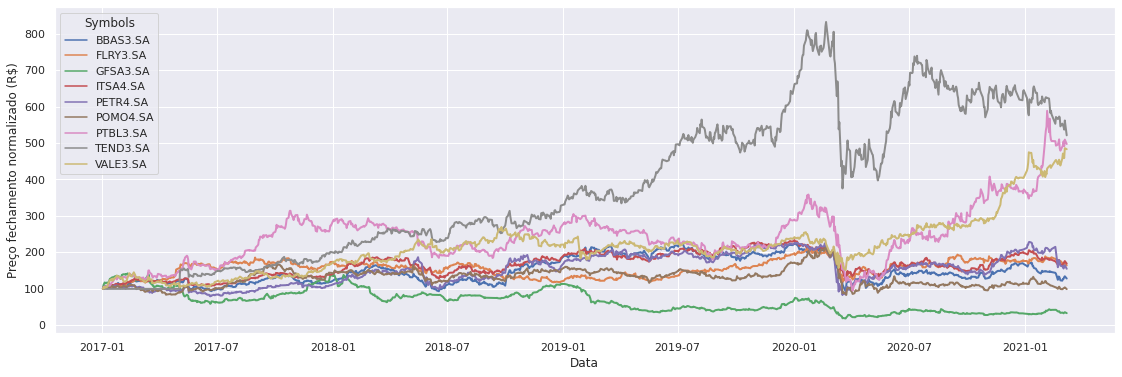

In [8]:
plt.figure(figsize = (19, 6))

sns.lineplot(data = dados/dados.iloc[0] * 100, linewidth = 2, dashes = False)

plt.xlabel('Data')
plt.ylabel('Preço fechamento normalizado (R$)')
plt.show()

Breves análises:
1. O ativo **TEND3** apresentou a maior taxa de apreciação até o início da pandemia do COVID-19, ultrapassando um aumento de 800%, sofreu a maior queda no início da mesma, mas apresentou uma rápida recuperação, sendo um dos três ativos que mais apreciaram, juntamente com **PTBL3** e **VALE3**;
2. **PTBL3** apresentou uma considerável variação positiva no início do período considerado nesta análise, uma leve queda no começo de 2020 seguida por um rápido crescimento ao longo do ano;
3. **VALE3** não demonstrou uma variação expressiva até depois do início da pandemia, onde apreciou significativamente;
4. A não ser por **GFSA3**, o único ativo que depreciou, os demais não apresentaram uma variação expressiva ao longo do período.

## Retornos Anuais
Pelo método 'pct_change()' podemos observar a variação percentual entre cada sucessão de linhas, nos fornecendo a variação diária entre o preço de fechamento de um ativo. Ao analisarmos a média diária e multiplicarmos pelo número de dias de negociação, que estamos considerando como 250, obtemos o retorno anual do mesmo. Aplicando este raciocínio para o dataframe ficamos com os retornos anuais de todos os ativos e, portanto, da carteira.

Text(0, 0.5, 'Retorno Anual')

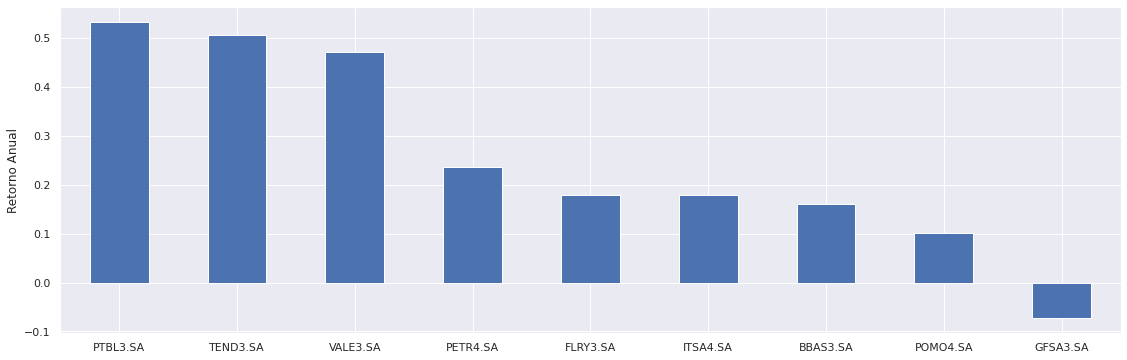

In [11]:
# retornos diários e anuais

dias_negoc = 250

d_returns = dados.pct_change()
a_returns = d_returns.mean() * dias_negoc

sns.set_theme()
a_returns.sort_values(ascending = False).plot(kind = 'bar', figsize = (19, 6))
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.ylabel('Retorno Anual')

Concluímos brevemente que:
1. **PTBL3**, **TEND3**, **VALE3** são os ativos que deram retornaram, muito acima dos demais;
2. **GFSA3** é o único ativo com retorno negativo, sendo do setores de construção civil e imobiliário, fortemente afetados pela pandemia do COVID-19;
3. Como **ITSA4** e **BBAS3** pertencem ao mesmo setor, era esperado um retorno similar entre ambas.

## Correlações

Essa grandeza nos relata sobre a influência que a variação de uma variável exerce sobre a outra, assumindo valores entre -1 até +1. O primeiro caso refere-se a uma influência negativa: as variações andam em sentidos opostos, caso uma seja positiva, a outra será negativa, e vice-versa. Já para o segundo, as variações andam no mesmo sentido.

Além de exibirmos o _heatmap_ do portfólio, mostramos um histograma das médias das correlações por ativo para analisarmos quais são os mais correlacionados, em média.

Text(78.02000000000001, 0.5, '')

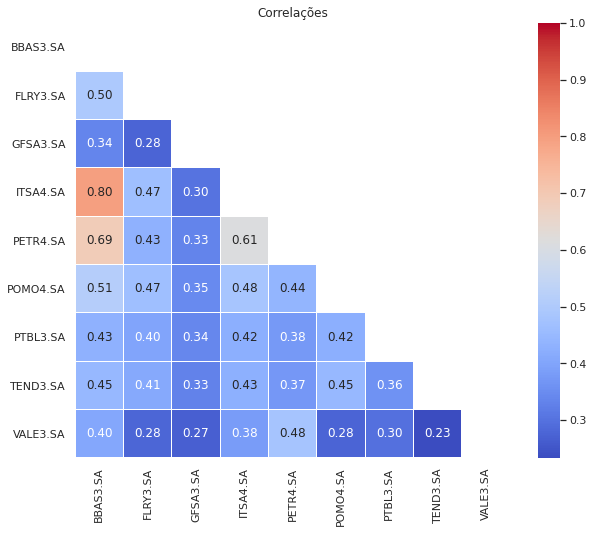

In [12]:
correlations = d_returns.corr()

# como desejamos limpar um pouco o heatmap, mostraremos somente a metade inferior
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (10, 8))
    ax = sns.heatmap(correlations, mask = mask, annot = True, 
                     cmap = 'coolwarm', fmt = '.2f', linewidths = 0.05, 
                     vmax = 1.0, square = True, linecolor = 'white')

plt.title('Correlações')
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, 'Média')

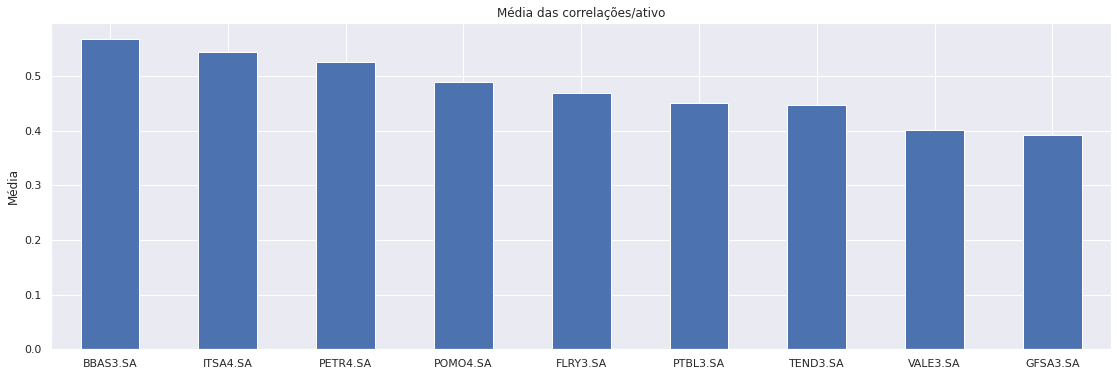

In [13]:
medias = [(col, correlations[col].mean()) for col in correlations]

medias = pd.Series(data = {media[0]: media[1] for media in medias})
medias.sort_values(ascending = False).plot(kind = 'bar', 
                                           title = 'Média das correlações/ativo', 
                                           figsize = (19, 6))
plt.xticks(rotation = 0)
plt.ylabel('Média')

É possível observar que:
1. **BBAS3**, **ITSA4** e **PETR4** estão altamente correlacionados entre si e são os que apresentam maior correlação entre toda a carteira;
2. **GFSA3** é o ativo mais diversificado, sendo mais correlacionado com **POMO4** em 35% e possuindo uma média de correlação abaixo de 40%;
3. A carteira não é altamente diversificada, o que nos leva à recomendação de adquirir mais ativos de outros setores e considerar se desfazer de, no mínimo, um dos ativos destacados no item 1 (nesta análise não estamos considerando o pagamento de dividendos).

## Otimização da Carteira
Aqui consideraremos diversas combinações entre os ativos de modo a obtermos seus respectivos retornos e variações. Destacaremos a carteira de menor volatilidade (que apresenta o menor risco, isto é, mais segura) e a de maior retorno por unidade de risco (carteira otimizada).

In [6]:
# listas para armazenarmos as quantidades de interesse, como retorno, peso, variação e indíce de Sharpe
cart_returns = []
peso_acoes = []
cart_vols = []
sharpe = []

# estabelecendo o número de ativos e o número de carteiras a serem geradas, neste caso 100.000
n_acoes = len(acoes)
n_carts = 100_000

# loop para a geração de várias combinações; utilizaremos a matriz de covariância para nos auxiliar no 
# cálculo da variância

a_cov = d_returns.cov() * dias_negoc
for _ in range(n_carts):
    peso = np.random.random(n_acoes)            # gerando n_carts valores aleatórios
    peso /= np.sum(peso)                        # normalizando-os
    
    ret = np.dot(peso, a_returns)               # retorno da carteira baseado na dist. de pesos
    var = np.dot(peso.T, np.dot(a_cov, peso))   # variância da carteira
    vol = np.sqrt(var)                          # volatilidade da carteira
    
    s = ret / vol                               # índice de Sharpe
    
    cart_returns.append(ret)
    peso_acoes.append(peso)
    cart_vols.append(vol)
    sharpe.append(s)

Determinando as carteiras desejadas com um dataframe auxiliar 'data', onde armazenaremos o retorno, a volatilidade e o índice de Sharpe das carteiras geradas acima.

In [11]:
carteira = {'Retorno': cart_returns, 
            'Volatilidade': cart_vols, 
            'Índice de Sharpe': sharpe}


# loop que adiciona cada ação pertencente a 'ações' com seus respectivos pesos, 
# obtidos na célula anterior, à 'carteira'
for k, acao in enumerate(acoes):
    carteira[acao] = [Peso[k] for Peso in peso_acoes]


# dataframe auxiliar que armazenará o retorno, a volatilidade e o índice de Shar-
# pe de cada carteira gerada, com os pesos correspondentes de cada ativo
data = pd.DataFrame(carteira)
colunas = ['Retorno', 'Volatilidade', 'Índice de Sharpe'] + [acao for acao in acoes]
data = data[colunas]


# carteiras de mínima volatilidade e maior índice de Sharpe
menor_vol = data['Volatilidade'].min()
maior_sharpe = data['Índice de Sharpe'].max()

# com a mínima volatilidade e o maior índice de Sharpe, determinamos as 
# carteiras correspondentes a tais indicadores
carteira_menor_vol = data.loc[data['Volatilidade'] == menor_vol]
carteira_maior_sharpe = data.loc[data['Índice de Sharpe'] == maior_sharpe]

### Fronteira Eficiente
Se colocarmos as carteiras geradas acima num plot de Volatilidade x Retorno, e utilizarmos uma escala de cor para fazermos referência ao índice de Sharpe de cada carteira, notamos que os pontos em verde determinam a **fronteira eficiente** do portfolio em consideração. Destacamos, também, as carteiras otimizadas:
1. Carteira de <span style="color: blue;">mínima volatilidade (mais segura);</span>
2. Carteira de <span style="color: red;">maior índice de Sharpe (a melhor carteira possível).</span>

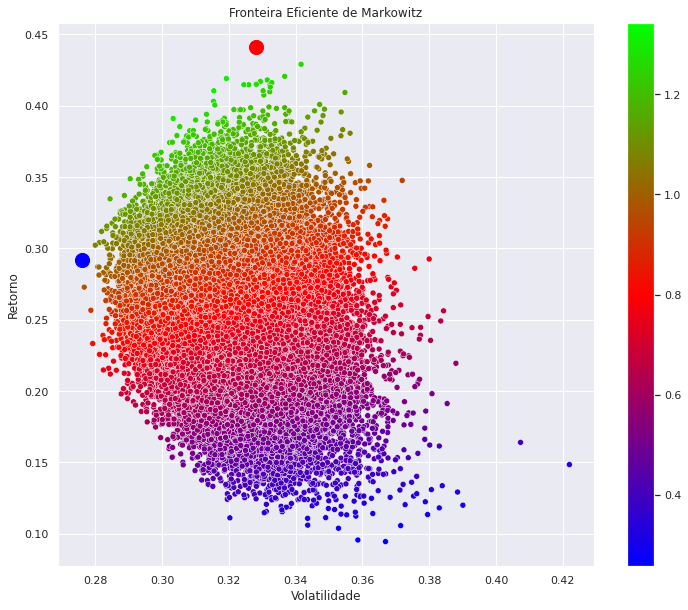

In [8]:
sns.set()

plt.figure(figsize = (12, 10))
cor = 'brg'
ax = sns.scatterplot(x = 'Volatilidade', y = 'Retorno', 
                     hue = 'Índice de Sharpe', data = data, 
                     palette = cor)

norm = plt.Normalize(data['Índice de Sharpe'].min(), 
                     data['Índice de Sharpe'].max())

sm = plt.cm.ScalarMappable(cmap = cor, norm = norm)
sm.set_array([])

ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.scatter(x = carteira_maior_sharpe['Volatilidade'], 
            y = carteira_maior_sharpe['Retorno'], c = 'red', 
            marker = 'o', s = 200)
plt.scatter(x = carteira_menor_vol['Volatilidade'], 
            y = carteira_menor_vol['Retorno'], c = 'blue', 
            marker = 'o', s = 200)

plt.title('Fronteira Eficiente de Markowitz')
plt.show()

Notamos a presença de poucas carteiras com índice de Sharpe maior que 1 e a ausência de definição da fronteira eficiente.

## Carteiras Otimizadas
1. Primeiro iremos ajustá-las para serem exibidas em porcentagem. Nota-se, porém, que a coluna referente ao índice de Sharpe não deve ser alterada.
2. Portanto, multiplicaremos todas, menos esta, por 100, com a função df_mult();
3. Realizaremos a exibição com o auxílio da função inc_pct(), que incluirá '%' no nome das colunas.

In [9]:
def df_mult(df, n = 1, coluna_jump = []):
    """Multiplica as colunas de de um dataframe por n.
    
    Parâmetros: df <dataframe>, n <int>, coluna_jump <list>;
    df: dataframe de entrada;
    n: fator que multiplicará as colunas de df (default 1);
    coluna_jump: caso desejar pular colunas de df, informá-las
    aqui (default []).
    
    Return: dataframe"""
    
    data = df.copy()
    
    for col in data:
        if col not in coluna_jump:
            data.loc[:, col] *= n

    return data


def inc_pct(df):
    """Recebe o dataframe df e inclui ' %' nos nomes de suas 
    colunas, exceto na coluna 'Índice de Sharpe'.
    
    Parâmetros: df <dataframe>
    df: dataframe de entrada.
    
    Return: dataframe"""
    
    colunas = [col for col in df if col != 'Índice de Sharpe']
    col_renomeadas = [f'{col} %' for col in colunas]
    
    return df.rename(columns = {par[0]: par[1] for par in 
                                zip(colunas, col_renomeadas)})

In [12]:
carteira_menor_vol = df_mult(carteira_menor_vol, n = 100, 
                            coluna_jump = ['Índice de Sharpe'])

carteira_maior_sharpe = df_mult(carteira_maior_sharpe, n = 100, 
                            coluna_jump = ['Índice de Sharpe'])

In [16]:
print('Carteira de Menor Volatlidade:')
display(inc_pct(carteira_menor_vol).T)

print('Carteira de Maior Índice de Sharpe:')
display(inc_pct(carteira_maior_sharpe).T)

Carteira de Menor Volatlidade:


,75069
Retorno %,29.157942
Volatilidade %,27.614700
Índice de Sharpe,1.055885
BBAS3.SA %,0.811921
FLRY3.SA %,27.601216
GFSA3.SA %,0.204954
ITSA4.SA %,26.089579
PETR4.SA %,1.638026
POMO4.SA %,6.028767
PTBL3.SA %,6.436196


Carteira de Maior Índice de Sharpe:


,439
Retorno %,44.082245
Volatilidade %,32.822926
Índice de Sharpe,1.343032
BBAS3.SA %,4.283696
FLRY3.SA %,3.300192
GFSA3.SA %,1.113986
ITSA4.SA %,3.639832
PETR4.SA %,0.745167
POMO4.SA %,3.908141
PTBL3.SA %,27.632855


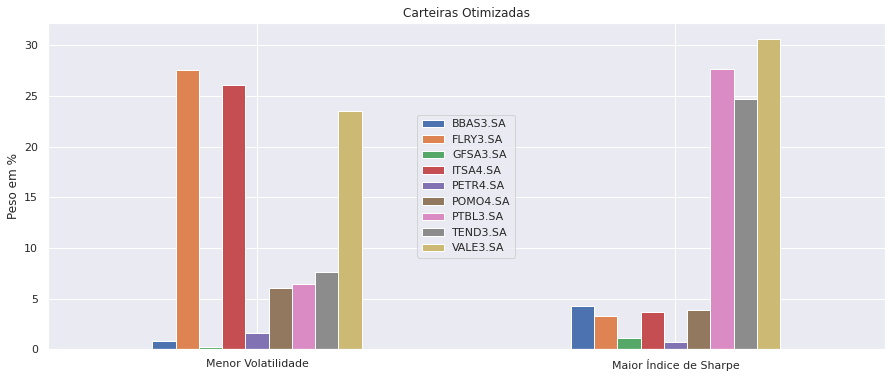

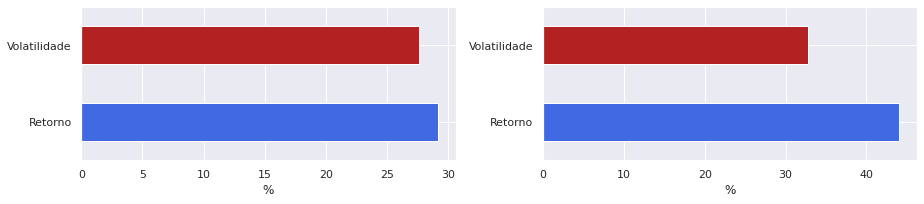

In [15]:
dfs = (carteira_menor_vol, carteira_maior_sharpe)
c = 'Índice de Sharpe'
colunas = ['Retorno', 'Volatilidade']
carteiras = pd.concat(dfs)

carteiras = carteiras.rename(index = 
                             {carteiras.index[0]: 'Menor Volatilidade', 
                              carteiras.index[1]: 'Maior Índice de Sharpe'}).drop(c, axis = 1)

carteiras.loc[:, acoes].plot(kind = 'bar', figsize = (19, 6), 
                             title = 'Carteiras Otimizadas', 
                             ylabel = 'Peso em %', 
                             rot = 0)

plt.legend(loc = 'center')

plt.figure(figsize = (13, 3))
plt.subplot(1, 2, 1)
carteiras.loc['Menor Volatilidade', colunas].plot(kind = 'barh', 
                                                  color = ['royalblue', 'firebrick'])
plt.xlabel('%')


plt.subplot(1, 2, 2)
carteiras.loc['Maior Índice de Sharpe', colunas].plot(kind = 'barh', 
                                                     color = ['royalblue', 'firebrick'])
plt.xlabel('%')

plt.tight_layout()
plt.show()

# Conclusões
- O ativos **VALE3** apresenta um alto peso em ambas otimizações, nos sugerindo ser o melhor ativo da carteira, assim merecendo um investimento maior;
- Em ambas otimizações notamos uma não uniformidade na distribuição dos pesos (isto é, há ativos com pesos muito maiores que os outros), fator desejável para uma carteira equilibrada/diversificada (ponderar este item juntamente ao próximo);
- Como há correlações altas, em média, é de se considerar aportes em novos ativos de setores diferentes para obter uma diversificação maior;
- Os ativos **GSFA3**, **BBAS3** e **PETR4** não apresentam um papel significante na carteira ($<$ 5%) e, se relembrarmos dos comentários supracitados, ao vermos um forte peso em **ITSA4**, recomendamos mantê-la na carteira;
- Apesar da carteira otimizada apresentar um bom índice de Sharpe, com um retorno maior que 40%, vemos um baixo número de carteiras eficientes, limitando a taxa retorno / risco, provavelmente devido à alta média de correlações;
- É válida a análise para um intervalo de tempo distinto para averiguarmos a resiliência dos resultados apresentados aqui.